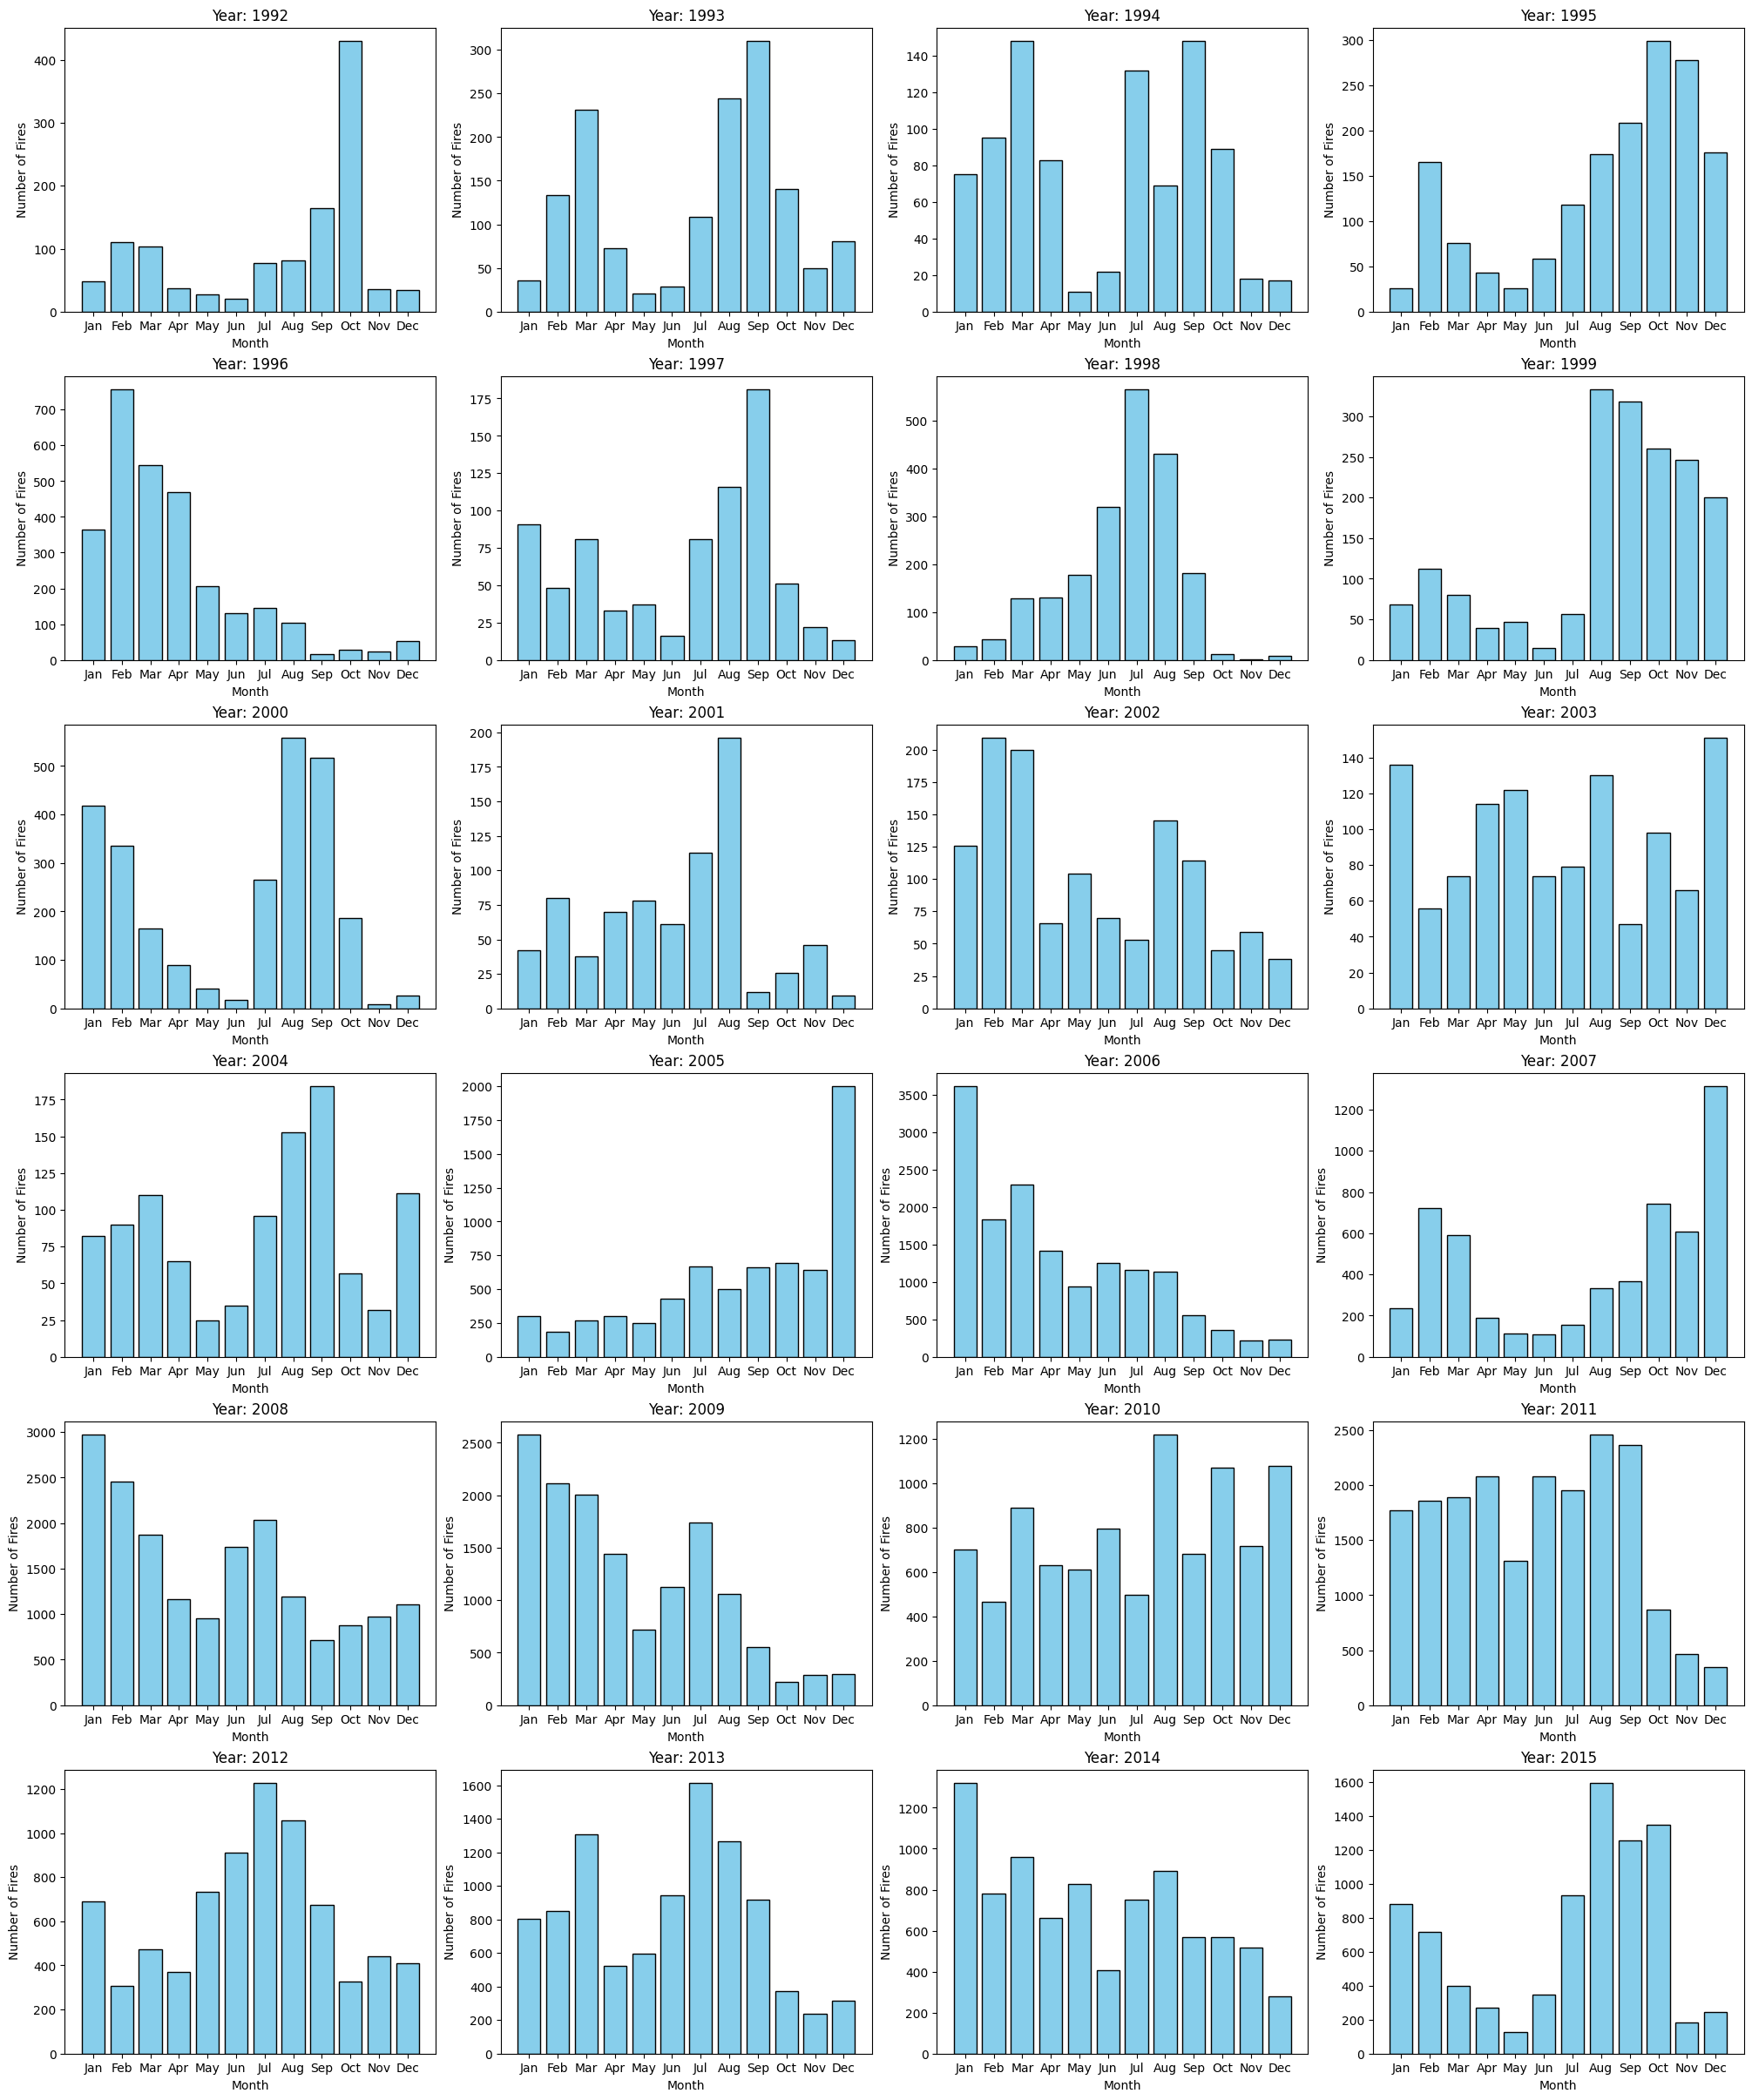

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../dataset/texas_fires.csv')

df['DISCOVERY_DATE_NEW'] = pd.to_datetime(df['DISCOVERY_DATE_NEW'])

df['Month'] = df['DISCOVERY_DATE_NEW'].dt.month
df['Year'] = df['DISCOVERY_DATE_NEW'].dt.year

monthly_fires = df.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')

unique_years = monthly_fires['Year'].unique()
num_years = len(unique_years)
rows = (num_years // cols) + (num_years % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4), constrained_layout=True)

axes = axes.flatten()

for i, year in enumerate(unique_years):
    data = monthly_fires[monthly_fires['Year'] == year]
    month_data = np.repeat(data['Month'], data['Fire_Count'])
    hist, bins = np.histogram(month_data, bins=np.arange(1, 14))
    
    axes[i].bar(bins[:-1], hist, width=0.8, align='center', color='skyblue', edgecolor='black')
    axes[i].set_title(f'Year: {year}')
    axes[i].set_xticks(np.arange(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Fires')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


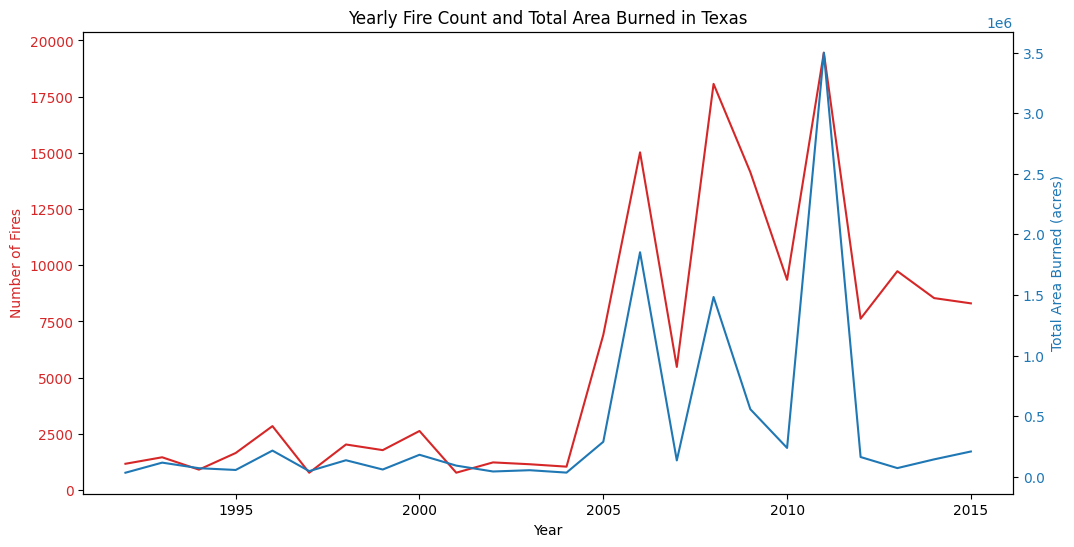

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load fire data
df = pd.read_csv('../dataset/texas_fires.csv')

df['DISCOVERY_DATE_NEW'] = pd.to_datetime(df['DISCOVERY_DATE_NEW'])

df['Month'] = df['DISCOVERY_DATE_NEW'].dt.month
df['Year'] = df['DISCOVERY_DATE_NEW'].dt.year

yearly_fires = df.groupby('Year').size().reset_index(name='Fire_Count')
yearly_area = df.groupby('Year')['FIRE_SIZE'].sum().reset_index(name='Total_Area')
monthly_fires = df.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')
monthly_area = df.groupby(['Year', 'Month'])['FIRE_SIZE'].sum().reset_index(name='Total_Area')

fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fires', color=color)
ax1.plot(yearly_fires['Year'], yearly_fires['Fire_Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Area Burned (acres)', color=color)
ax2.plot(yearly_area['Year'], yearly_area['Total_Area'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Yearly Fire Count and Total Area Burned in Texas')
plt.show()


<Axes: xlabel='Year', ylabel='Fire_Count'>

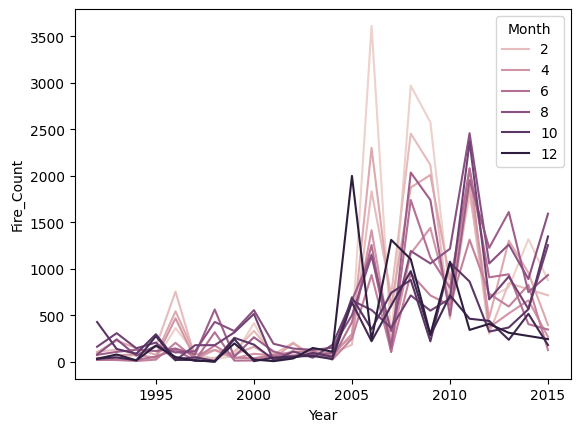

In [14]:
sns.lineplot(data=monthly_fires, x='Year', y='Fire_Count', hue='Month')


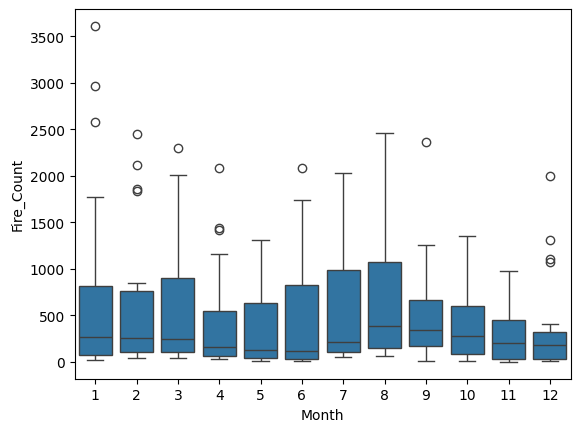

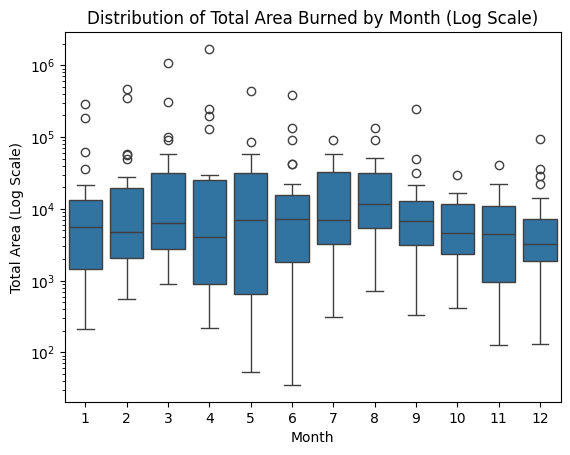

In [15]:
sns.boxplot(data=monthly_fires, x='Month', y='Fire_Count')

plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=monthly_area, x='Month', y='Total_Area')

plt.yscale('log')

plt.title('Distribution of Total Area Burned by Month (Log Scale)')
plt.xlabel('Month')
plt.ylabel('Total Area (Log Scale)')

plt.show()


In [16]:
df = pd.read_csv('../dataset/texas_fires_with_fips.csv')

In [18]:
texas_fires_with_drought_and_fips = pd.read_csv('../dataset/texas_fires_drought.csv')

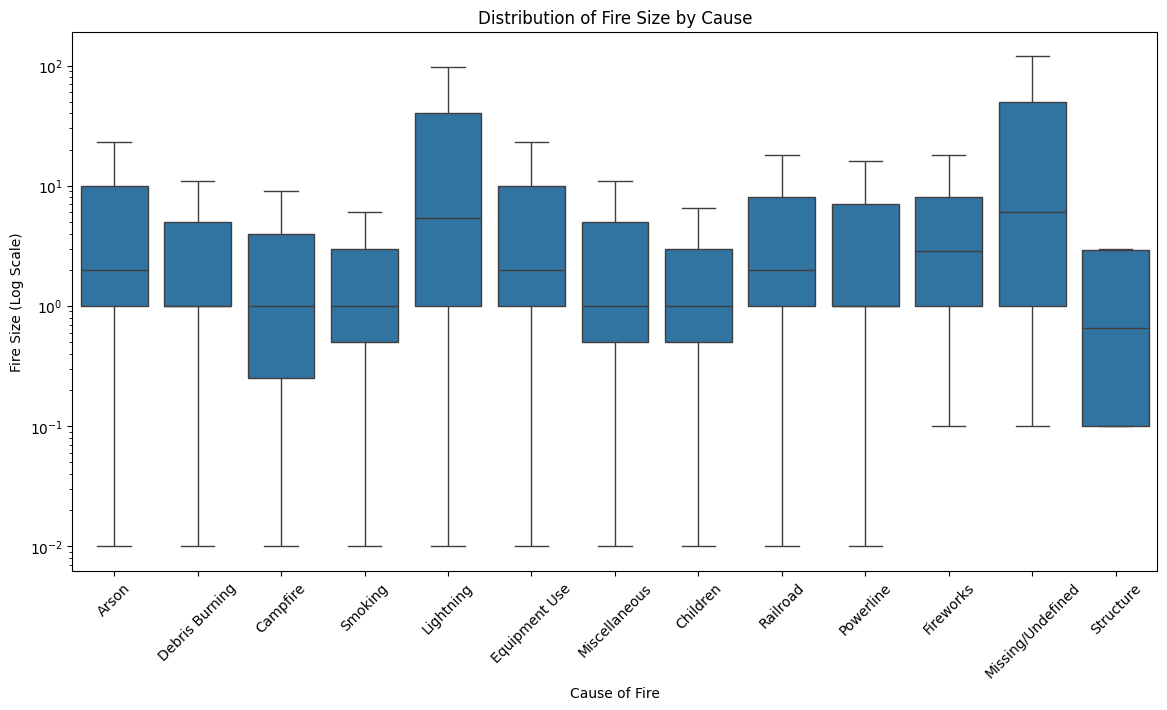

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of fire size by cause
plt.figure(figsize=(14, 7))
sns.boxplot(data=texas_fires_with_drought_and_fips, x='STAT_CAUSE_DESCR', y='FIRE_SIZE', showfliers=False)
plt.yscale('log')  # Use log scale for fire size
plt.xticks(rotation=45)
plt.title('Distribution of Fire Size by Cause')
plt.xlabel('Cause of Fire')
plt.ylabel('Fire Size (Log Scale)')
plt.show()


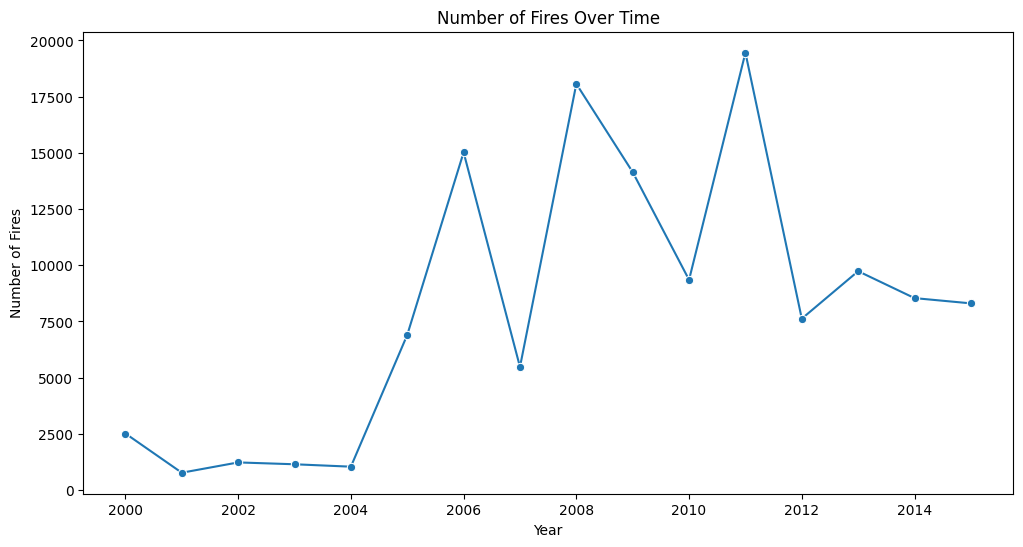

In [22]:
# Group by year and count fires
yearly_fires = texas_fires_with_drought_and_fips.groupby('FIRE_YEAR').size().reset_index(name='Fire_Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_fires, x='FIRE_YEAR', y='Fire_Count', marker='o')
plt.title('Number of Fires Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()


<Figure size 1200x600 with 0 Axes>

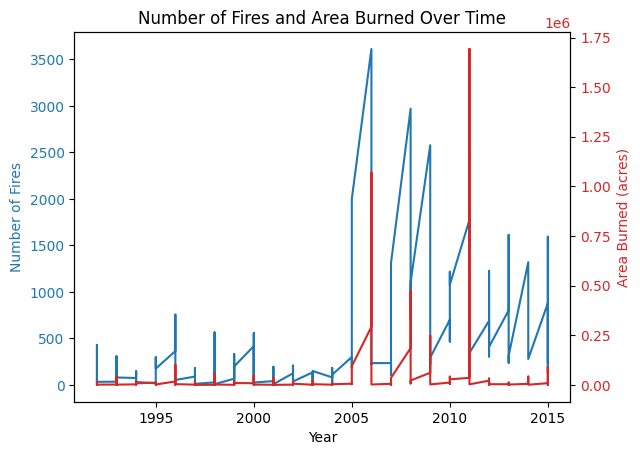